In [1]:
import os
import ROOT
from math import pow, sqrt

Welcome to JupyROOT 6.28/04


In [2]:
WORKDIR = "/home/choij/workspace/ChargedHiggsAnalysis"
ERA     = "2016preVFP"
CHANNEL = "MeasFakeMu8"

In [3]:
#### sample list
if "El" in CHANNEL:
    if "2016" in ERA:  DataStream = "DoubleEG"
    if "2017" in ERA:  DataStream = "SingleElectron"
    if "2018" in ERA:  DataStream = "EGamma"
if "Mu" in CHANNEL:
    DataStream = "DoubleMuon"

In [4]:
W  = ["WJets_MG"]
DY = ["DYJets", "DYJets10to50_MG"]
TT = ["TTLL_powheg"]
VV = ["WW_pythia", "WZ_pythia", "ZZ_pythia"]
ST = ["SingleTop_sch_Lep", "SingleTop_tch_top_Incl", "SingleTop_tch_antitop_Incl",
      "SingleTop_tW_top_NoFullyHad", "SingleTop_tW_antitop_NoFullyHad"]
MCList = W + DY + TT + VV + ST

In [5]:
SYSTs = ["Central", 
         ("MotherJetPtUp", "MotherJetPtDown"),
         "RequireHeavyTag"]

In [6]:
# data
file_path = f"{WORKDIR}/data/MeasFakeRateV3/{ERA}/{CHANNEL}__/DATA/MeasFakeRateV3_{DataStream}.root"
assert os.path.exists(file_path)
f = ROOT.TFile.Open(file_path)
data_loose = f.Get("QCDEnriched/loose/Central/abseta_ptcorr"); data_loose.SetDirectory(0)
data_tight = f.Get("QCDEnriched/tight/Central/abseta_ptcorr"); data_tight.SetDirectory(0)
f.Close()

In [17]:
# prompt subtraction
# Central
mc_loose = None
mc_tight = None
for sample in MCList:
    file_path = f"{WORKDIR}/data/MeasFakeRateV3/{ERA}/{CHANNEL}__RunSyst__/MeasFakeRateV3_{sample}.root"
    assert os.path.exists(file_path)
    f = ROOT.TFile.Open(file_path)
    try:
        h_loose = f.Get("QCDEnriched/loose/Central/abseta_ptcorr"); h_loose.SetDirectory(0)
        h_tight = f.Get("QCDEnriched/tight/Central/abseta_ptcorr"); h_tight.SetDirectory(0)
        h_loose.Scale(0.00045052908036432963)
        h_tight.Scale(0.00044480904623369185)
        if mc_loose is None:
            mc_loose = h_loose.Clone("mc_loose")
            mc_loose.SetDirectory(0)
        else:
            mc_loose.Add(h_loose)
        if mc_tight is None:
            mc_tight = h_tight.Clone("mc_tight")
            mc_tight.SetDirectory(0)
        else:
            mc_tight.Add(h_tight)
    except Exception as e:
        print(e)
        print(sample)
    f.Close()

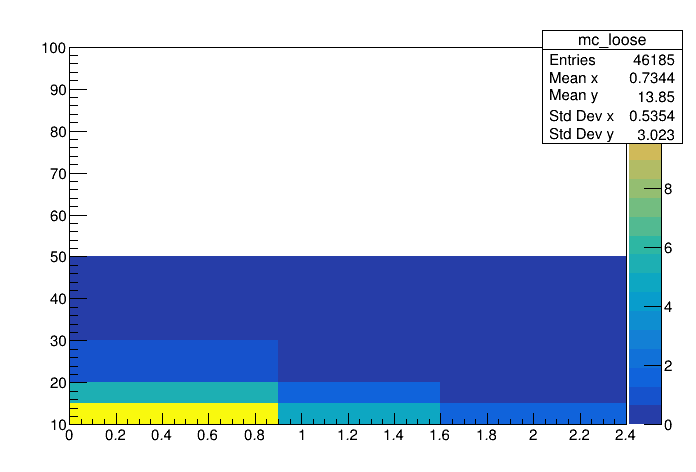

In [18]:
c = ROOT.TCanvas()
c.cd()
mc_loose.Draw("colz")
c.Draw()

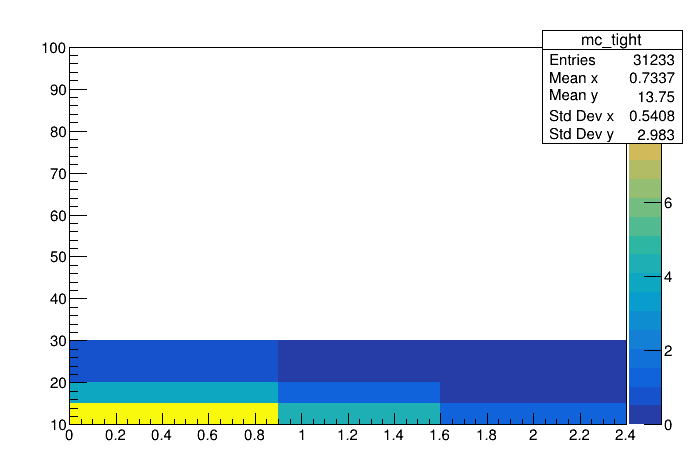

In [19]:
c = ROOT.TCanvas()
c.cd()
mc_tight.Draw("colz")
c.Draw()

In [20]:
nonprompt_loose = data_loose.Clone("nonprompt_loose")
nonprompt_loose.Add(mc_loose, -1)
nonprompt_tight = data_tight.Clone("nonprompt_tight")
nonprompt_tight.Add(mc_tight, -1)

True

In [21]:
fakerate = nonprompt_tight.Clone("fakerate")
fakerate.Divide(nonprompt_loose)

True

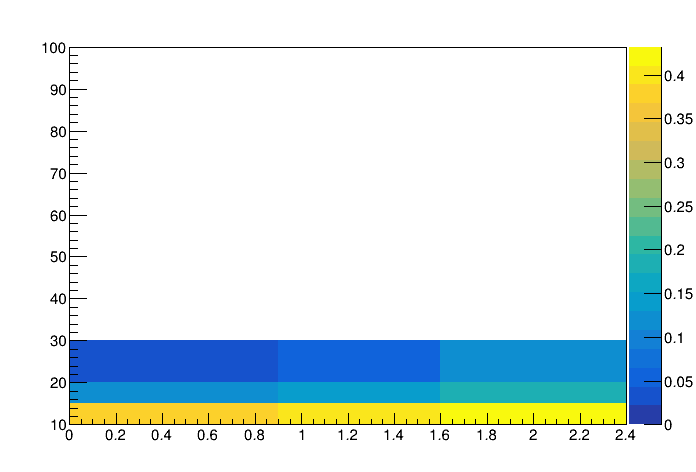

In [22]:
fakerate.SetStats(0)
c = ROOT.TCanvas()
c.cd()
fakerate.Draw("colz")
c.Draw()

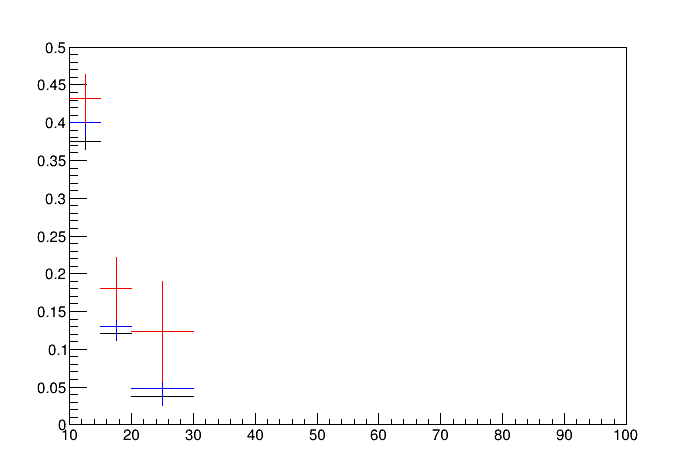

In [29]:
proj_y1 = fakerate.ProjectionY("y1", 1, 1); proj_y1.SetLineColor(ROOT.kBlack)
proj_y2 = fakerate.ProjectionY("y2", 2, 2); proj_y2.SetLineColor(ROOT.kBlue)
proj_y3 = fakerate.ProjectionY("y3", 3, 3); proj_y3.SetLineColor(ROOT.kRed)

proj_y1.SetStats(0)
proj_y1.GetYaxis().SetRangeUser(0., 0.5)
c = ROOT.TCanvas()
c.cd()
proj_y1.Draw()
proj_y2.Draw("same")
proj_y3.Draw("same")
c.Draw()